In [1]:
# Import libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras_cv

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
HOME = os.getcwd()
print(HOME)

2024-03-31 16:04:15.612141: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 16:04:15.612208: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 16:04:15.612238: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 16:04:15.620903: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 16:04:16.848259: W tensorflow/compiler/

Using TensorFlow backend
Num GPUs Available:  1
/home/evaristo/LBYCPH3_Project_1


2024-03-31 16:04:20.549161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-31 16:04:20.684106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-31 16:04:20.684203: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
from keras.models import load_model
objdet_model =load_model("retinanet_yolov8_large_leatherds_model.keras", compile=True)
objdet_model.summary()
class_names = {0: 'cut', 1: 'fold', 2: 'stain'}

2024-03-31 16:04:20.729838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-31 16:04:20.730174: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-31 16:04:20.730306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-31 16:04:20.859969: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-31 16:04:20.860157: I tensorflow/compile

/home/evaristo/anaconda3/lib/python3.11/site-packages/keras_cv/src/models/task.py:43: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/evaristo/anaconda3/lib/python3.11/site-packages/keras_cv/src/models/task.py:43: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


Model: "retina_net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 images (InputLayer)         [(None, None, None, 3)]      0         []                            
                                                                                                  
 model (Functional)          {'P3': (None, None, None,    1983174   ['images[0][0]']              
                             256),                        4                                       
                              'P4': (None, None, None,                                            
                             512),                                                                
                              'P5': (None, None, None,                                            
                             512)}                                                       

In [3]:
from keras_cv.layers import Resizing

infer_folder = str(HOME) + '/Lthr-Dtctrn2-12/infer/'

resizer_fn = Resizing(416, 416, pad_to_aspect_ratio=True, bounding_box_format="XYXY")

In [4]:
def load_imgs(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  return {"images": tf.cast(image, tf.float32)}

image_paths = tf.ragged.constant([infer_folder + str(i)+'.jpeg' for i in range(0,33)]) # Change range depending on dataset
image_paths = tf.data.Dataset.from_tensor_slices(image_paths)

infer_dataset = image_paths.map(load_imgs)
infer_dataset = infer_dataset.map(resizer_fn)
infer_dataset = infer_dataset.batch(10)

In [5]:
from keras_cv.visualization import plot_bounding_box_gallery

def custom_plot(num, imgs, y_preds):
  plot_bounding_box_gallery(
      imgs[num-1],
      value_range=(0, 255),
      y_pred=y_preds[num-1],
      rows=2,
      cols=5,
      scale=3,
      font_scale=1,
      bounding_box_format="xyxy",
      class_mapping=class_names,
  )

# Predictions
imgs = []
y_preds = []
for batch in infer_dataset.take(3):
  img = batch["images"]
  y_pred = objdet_model.predict(img)
  imgs.append(img)
  y_preds.append(y_pred)


2024-03-31 16:04:49.655016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-03-31 16:04:49.888973: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-31 16:04:53.207745: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.49GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 [==============================] - 24s 24s/step


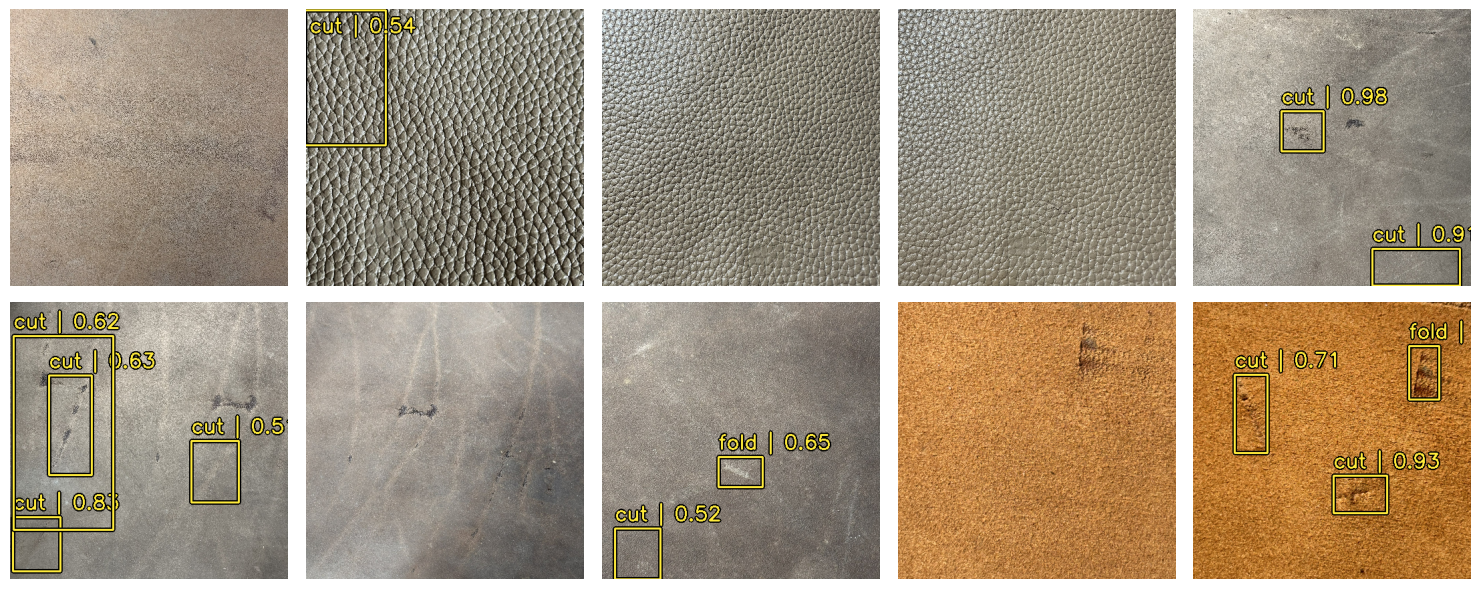

In [6]:
# Batch 1
custom_plot(1, imgs, y_preds)

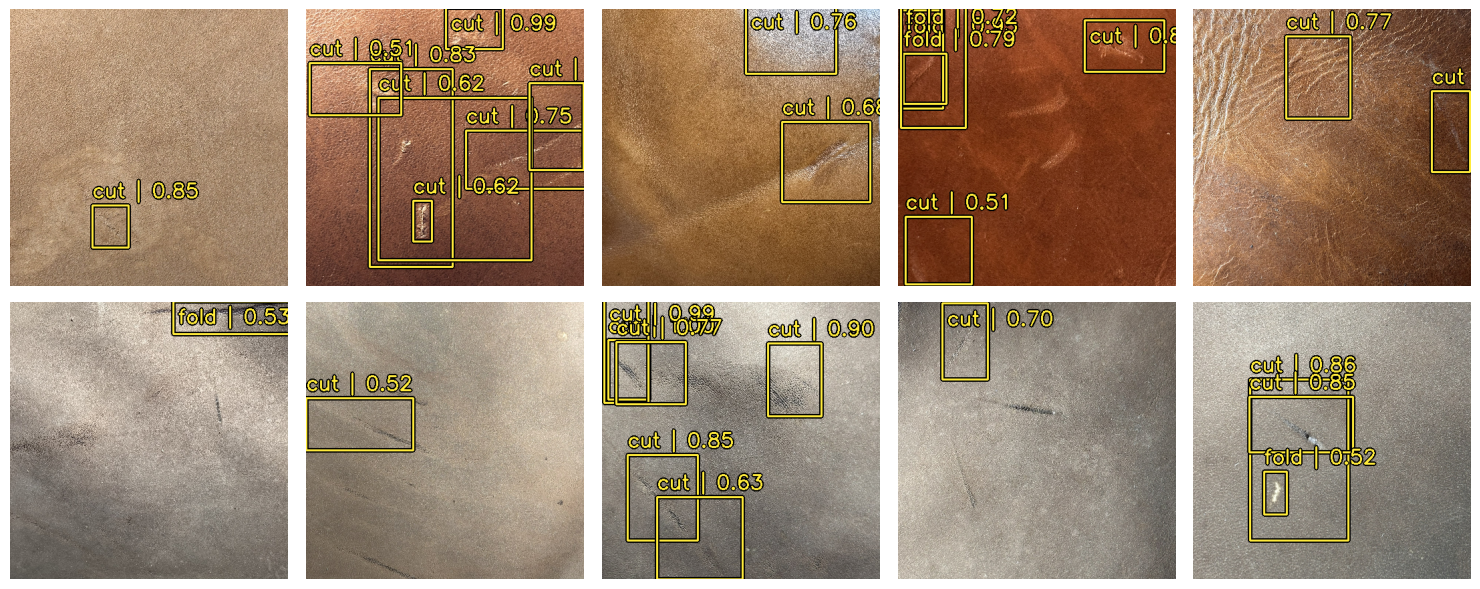

In [7]:
# Batch 2
custom_plot(2, imgs, y_preds)

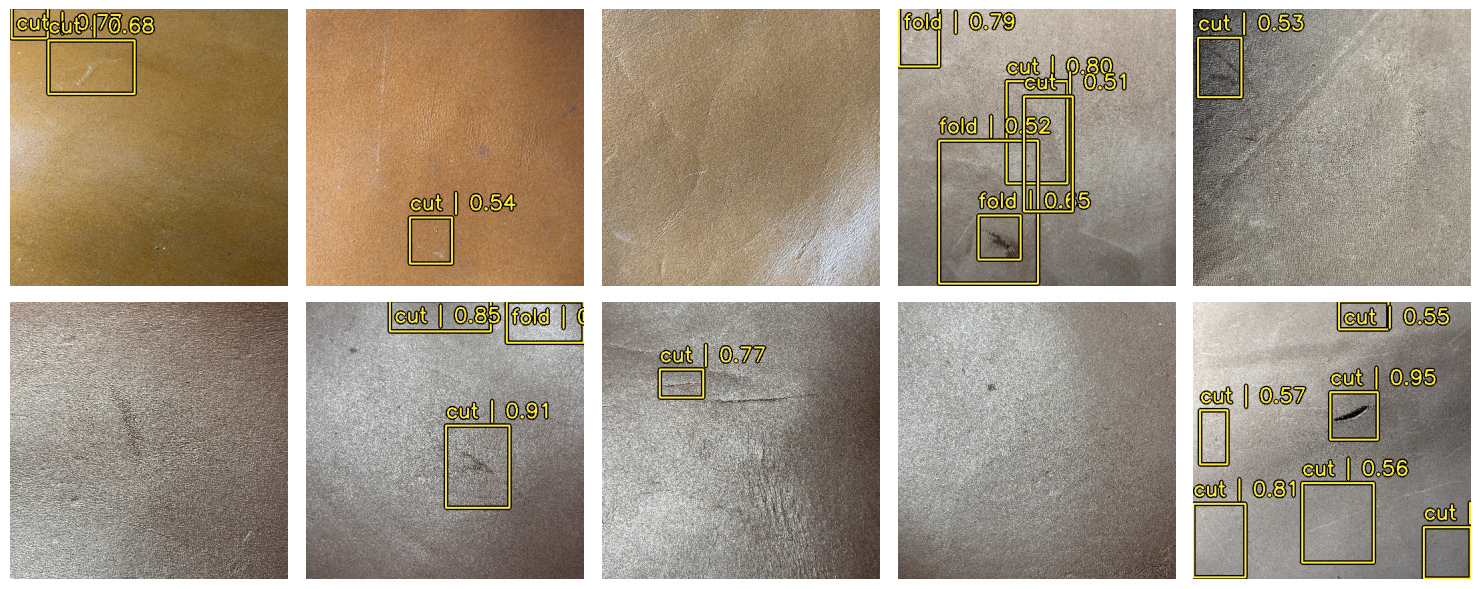

In [8]:
# Batch 3
custom_plot(3, imgs, y_preds)